## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings;warnings.filterwarnings(action='ignore')

## Read data

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
print('학습데이터 수:', train.shape)
print('평가데이터 수:', test.shape)

학습데이터 수: (252289, 19)
평가데이터 수: (79786, 18)


In [4]:
'''
데이터 설명
- sessionID : 세션 ID
- userID : 사용자 ID
- TARGET : 세션에서 발생한 총 조회수
- browser : 사용된 브라우저
- OS : 사용된 기기의 운영체제
- device : 사용된 기기
- new : 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)
- quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)
- duration : 총 세션 시간 (단위: 초)
- bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)
- transaction : 세션 내에서 발생의 거래의 수
- transaction_revenue : 총 거래 수익
- continent : 세션이 발생한 대륙
- subcontinent : 세션이 발생한 하위 대륙
- country : 세션이 발생한 국가
- traffic_source : 트래픽이 발생한 소스
- traffic_medium : 트래픽 소스의 매체
- keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정
- referral_path : traffic_medium이 referral인 경우 설정되는 경로
'''
display(train.head())

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


## Correlation with TARGET

In [5]:
# userID는 제외한다.
numeric = ['quality','duration','transaction','transaction_revenue']
category = ['browser', 'OS', 'device', 'new','bounced','continent', 'subcontinent', 'country',
            'traffic_source','traffic_medium', 'keyword', 'referral_path']

<Figure size 1440x1440 with 0 Axes>

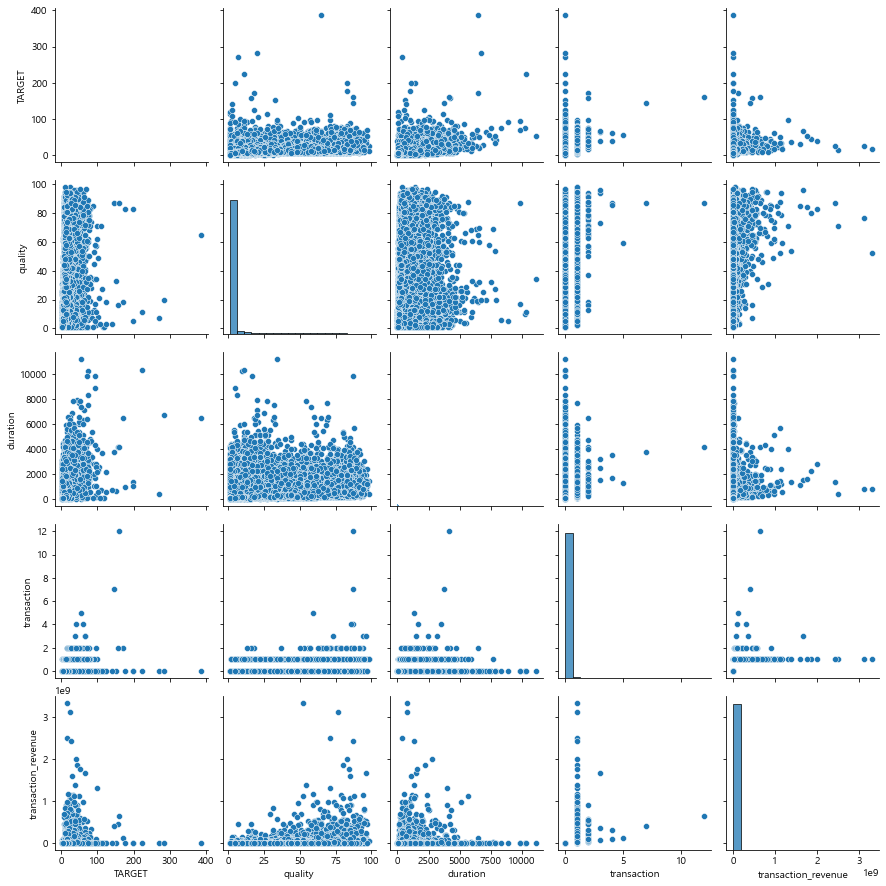

In [6]:
# 수치형 주요 변수들간 pairplot을 그려본다.
plt.figure(figsize=(20,20))
sns.pairplot(train[['TARGET']+numeric])
plt.show()

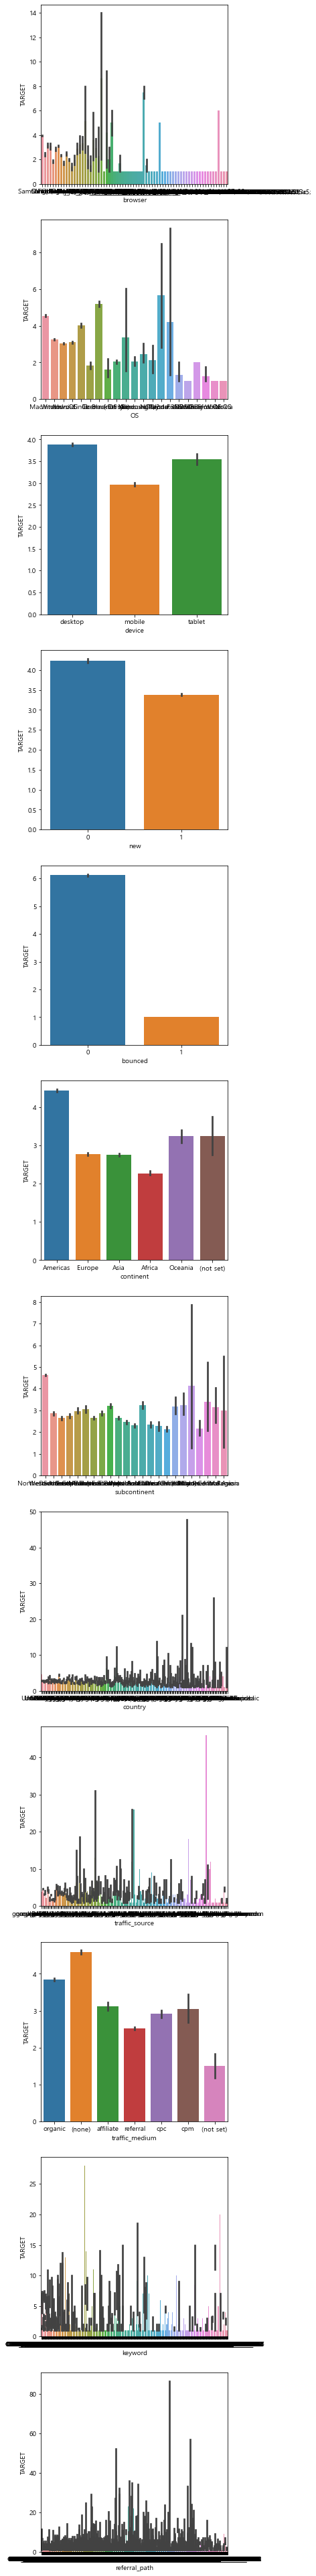

In [7]:
# 범주형 변수간 상관관계를 확인해본다.
fig, ax = plt.subplots(len(category),1, figsize=(5,70))

for n_col in range(len(category)):
    sns.barplot(data=train, x=category[n_col], y='TARGET', ax=ax[n_col])
plt.show()

### Split data
이탈 여부간 TARGET 차이로 이탈 데이터인지 아닌지로 데이터를 구분해 모델을 학습시킨다.

In [8]:
train.query('bounced != 1').to_csv('../data/stayed_train.csv', index=False)
test.query('bounced != 1').to_csv('../data/stayed_test.csv', index=False)

In [9]:
sample = pd.read_csv('../data/submission/sample_submission.csv')
sample.loc[test.query('bounced==1').index, 'TARGET'] = 1
display(sample.TARGET.value_counts(dropna=False))

0    40148
1    39638
Name: TARGET, dtype: int64

In [10]:
# 이탈 데이터면 반드시 TARGET이 1이도록 설정한다.
sample.to_csv('../data/submission/sample_submission.csv', index=False)